Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
encoder_conv_layer_1 (Conv2D)   (None, 28, 28, 32)   320         encoder_input[0][0]              
__________________________________________________________________________________________________
encoder_relu_1 (ReLU)           (None, 28, 28, 32)   0           encoder_conv_layer_1[0][0]       
__________________________________________________________________________________________________
encoder_bn_1 (BatchNormalizatio (None, 28, 28, 32)   128         encoder_relu_1[0][0]             
____________________________________________________________________________________________

1000/1000 [==============================] - 6s 6ms/sample - loss: 73.1860 - _calculate_reconstruction_loss: 0.0670 - _calculate_kl_loss: 6.1525
Epoch 10/10
1000/1000 [==============================] - 6s 6ms/sample - loss: 89.6457 - _calculate_reconstruction_loss: 0.0748 - _calculate_kl_loss: 14.8778


F:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


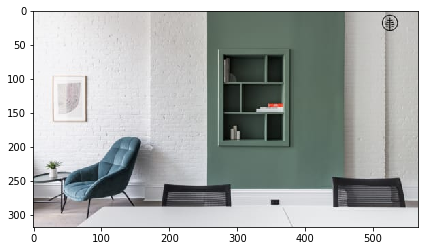

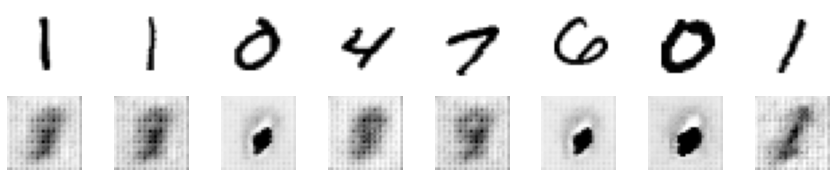

In [101]:
import numpy as np
import matplotlib.pyplot as plt

from train_model import load_mnist, train


def select_images(images, num_images=10):
    sample_images_index = np.random.choice(range(len(images)), num_images)
    sample_images = images[sample_images_index]
    return sample_images


def plot_reconstructed_images(images, reconstructed_images):
    fig = plt.figure(figsize=(15, 3))
    num_images = len(images)
    for i, (image, reconstructed_image) in enumerate(zip(images, reconstructed_images)):
        image = image.squeeze()
        ax = fig.add_subplot(2, num_images, i + 1)
        ax.axis("off")
        ax.imshow(image, cmap="gray_r");
        reconstructed_image = reconstructed_image.squeeze()
        ax = fig.add_subplot(2, num_images, i + num_images + 1)
        ax.axis("off")
        ax.imshow(reconstructed_image, cmap="gray_r");
    plt.show();


if __name__ == "__main__":
    
    x_train, _, _, _ = load_mnist()
    
    LEARNING_RATE = 0.0005
    BATCH_SIZE = 32
    EPOCHS = 10
    
    #TRAINING DATA
    autoencoder = train(x_train[:1000], LEARNING_RATE, BATCH_SIZE, EPOCHS, x_train.shape[1:])

    num_sample_images_to_show = 8
    sample_images= select_images(x_train, num_sample_images_to_show)
    
    #Reconstructing Images
    reconstructed_images, latent_representation = autoencoder.reconstruct(sample_images) 
    
    plot_reconstructed_images(sample_images, reconstructed_images)

In [110]:
sample_images.shape

(8, 28, 28, 1)

In [104]:
print(latent_representation.shape)
latent_representation

(8, 2)


array([[-1.1720006 ,  1.3084041 ],
       [-1.1697752 ,  2.0527506 ],
       [ 0.7848344 , -1.6074404 ],
       [-0.26157987, -0.5434152 ],
       [-0.29200816,  1.9048429 ],
       [ 1.4849577 , -1.3710688 ],
       [ 2.6692123 , -2.5696113 ],
       [-3.5456367 ,  1.8688512 ]], dtype=float32)

In [106]:
print(reconstructed_images.shape)
reconstructed_images

(8, 28, 28, 1)


array([[[[0.12660363],
         [0.11596829],
         [0.11063054],
         ...,
         [0.09374213],
         [0.08719677],
         [0.15054178]],

        [[0.10561946],
         [0.11042053],
         [0.10355431],
         ...,
         [0.0847123 ],
         [0.08881477],
         [0.1485577 ]],

        [[0.09202275],
         [0.11787766],
         [0.09671322],
         ...,
         [0.09541601],
         [0.07643569],
         [0.13592511]],

        ...,

        [[0.08288908],
         [0.12029675],
         [0.09485692],
         ...,
         [0.0924446 ],
         [0.08078438],
         [0.1306988 ]],

        [[0.08362991],
         [0.10461858],
         [0.08951017],
         ...,
         [0.09876528],
         [0.08392856],
         [0.1184459 ]],

        [[0.13629785],
         [0.1539124 ],
         [0.10382256],
         ...,
         [0.11290696],
         [0.08962649],
         [0.15923363]]],


       [[[0.12647799],
         [0.11461014],
         [0.10

# RANDOM IMAGE

(128, 128) (128, 128)


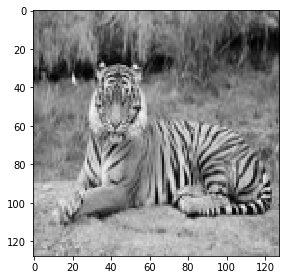

In [79]:
from skimage.io import imread, imshow
import cv2

img1 = imread(r"F:\4 - DESKTOP\video BG\tiger.jpg")
img2 = imread(r"F:\4 - DESKTOP\video BG\bear.jpg")
gray1 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)
size = (128,128)
gray1 = cv2.resize(gray1,size)
gray2 = cv2.resize(gray2,size)

print(gray1.shape,gray2.shape)
imshow(gray1);

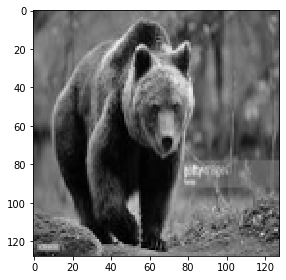

In [80]:
imshow(gray2);

In [81]:
# METHOD1
# from scipy import signal
# # a = signal.correlate(gray1,gray2)
# a = signal.correlate2d (gray1,gray2)

# METHOD2
# import numpy as np
# out = np.dot(gray1,gray2.T)

# rgb = cv2.cvtColor(out,cv2.COLOR_GRAY2RGB)
# new = cv2.medianBlur(cor2,5)
# new.shape

In [82]:
import scipy
import numpy as np

cor = np.corrcoef(gray1,gray2)
cor.shape

(256, 256)

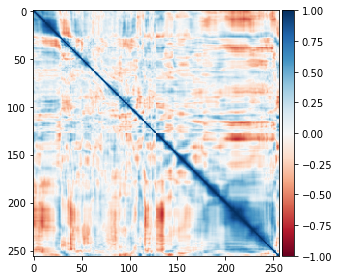

In [83]:
imshow(cor);

In [84]:
import numpy as np

pad = np.max(gray1.shape) // 2
fft1 = np.fft.fft2(np.pad(gray1, pad))
fft2 = np.fft.fft2(np.pad(gray2, pad))
prod = fft1 * fft2.conj()
result_full = np.fft.fftshift(np.fft.ifft2(prod))
corr = result_full.real[1+pad:-pad+1, 1+pad:-pad+1]

In [85]:
corr.shape

(128, 128)

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
corr_data = scaler.fit_transform(corr)

In [94]:
corr_data.shape

(128, 128)

In [97]:
corr_data[corr_data>1].shape

(2794,)

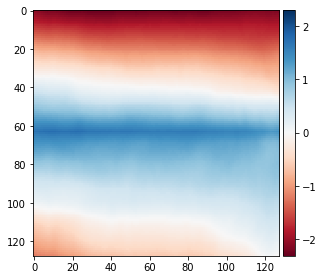

In [99]:
imshow(corr_data);

# TESTING ON NEW IMAGE

In [71]:
# from train_model import load_mnist, train
# import cv2

# org_shape = img.shape
# print(org_shape[:-1])

# size = (128,128)
# img = cv2.resize(img, size)
# print(img.shape)

# gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# imshow(gray);

# gray = gray.reshape((1,)+gray.shape + (1,))
# print(gray.shape) #(1, 28, 28, 1)

# LEARNING_RATE = 0.0005
# BATCH_SIZE = 1
# EPOCHS = 100
# autoencoder = train(gray, LEARNING_RATE, BATCH_SIZE, EPOCHS, gray.shape[1:])

# import numpy as np
# reconstructed_images, _ = autoencoder.reconstruct(gray)
# output = np.resize(reconstructed_images,size)
# output*=255

# color_img = cv2.cvtColor(output,cv2.COLOR_GRAY2RGB)
# print(color_img.shape)
# color_img.dtype

# color_img = color_img.astype("uint8")
# imshow(color_img);

# USING CORRELATION

In [42]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [43]:
x_train.shape

(60000, 28, 28)

In [44]:
x = x_train[0]
y = x_train[1]
x = signal.correlate(x,y)

for i in range(1,10):
    y = x_train[i]
    x = signal.correlate(new_x,new_y)

In [45]:
x.shape

(28, 28)

In [46]:
color_img = cv2.cvtColor(x,cv2.COLOR_GRAY2RGB)
color_img.shape

(28, 28, 3)

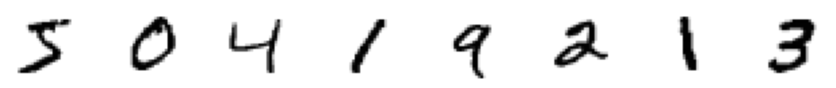

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 3))
for i in range(8):
    ax = fig.add_subplot(2, 8, i + 1)
    ax.axis("off")
    ax.imshow(x_train[i], cmap="gray_r");

In [69]:
import cv2
new_img = cv2.medianBlur(color_img,19)

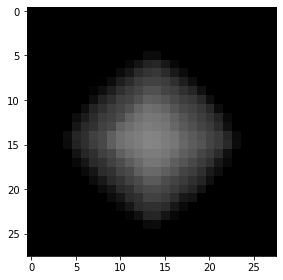

In [70]:
imshow(new_img);